## Trabalho 2 - Análise de scripts da trilogia "Star wars"
#### INF1030 - Introdução a ciência dos dados

#### Alunos: Leonardo E. Wajnsztok e Samuel Bastos

In [5]:
import pandas as pd
import matplotlib

In [6]:
SW_EP4 = 'Star Wars: Episode IV - A New Hope'
SW_EP5 = 'Star Wars: Episode V - The Empire Strikes Back'
SW_EP6 = 'Star Wars: Episode VI - Return of the Jedi'

movies = [
    {'script': 'star-wars-movie-scripts/SW_EpisodeIV.txt', 'movie': SW_EP4},
    {'script': 'star-wars-movie-scripts/SW_EpisodeV.txt', 'movie': SW_EP5},
    {'script': 'star-wars-movie-scripts/SW_EpisodeVI.txt', 'movie': SW_EP6},
]

In [10]:
trilogy = pd.DataFrame()

for m in movies:
    episode = pd.read_table(m['script'], delim_whitespace=True, header=0, escapechar='\\')
    episode['movie'] = m['movie']
    
    print (m['movie'])
    print (episode.shape)
    
    trilogy = trilogy.append(episode)

Star Wars: Episode IV - A New Hope
(1010, 3)
Star Wars: Episode V - The Empire Strikes Back
(839, 3)
Star Wars: Episode VI - Return of the Jedi
(674, 3)


In [9]:
trilogy.shape

(2523, 3)

## All characters

In [11]:
all_characters_ep1 = trilogy.character.unique()
print (len(all_characters_ep1), 'characters')
print (all_characters_ep1)

129 characters
['THREEPIO' 'LUKE' 'IMPERIAL OFFICER' 'VADER' 'REBEL OFFICER' 'TROOPER'
 'CHIEF PILOT' 'CAPTAIN' 'WOMAN' 'FIXER' 'CAMIE' 'BIGGS' 'DEAK' 'LEIA'
 'COMMANDER' 'SECOND OFFICER' 'FIRST TROOPER' 'SECOND TROOPER' 'BERU'
 'OWEN' 'AUNT BERU' 'BEN' 'TAGGE' 'MOTTI' 'TARKIN' 'BARTENDER' 'CREATURE'
 'HUMAN' 'HAN' 'GREEDO' 'JABBA' 'OFFICER CASS'
 'VOICE OVER DEATH STAR INTERCOM' 'OFFICER' 'VOICE' 'GANTRY OFFICER'
 'INTERCOM VOICE' 'TROOPER VOICE' 'FIRST OFFICER' 'WILLARD'
 'DEATH STAR INTERCOM VOICE' 'DODONNA' 'GOLD LEADER' 'WEDGE' 'MAN'
 'RED LEADER' 'CHIEF' 'MASSASSI INTERCOM VOICE' 'RED TEN' 'RED SEVEN'
 'PORKINS' 'RED NINE' 'RED ELEVEN' 'ASTRO-OFFICER' 'CONTROL OFFICER'
 'GOLD FIVE' 'GOLD TWO' 'WINGMAN' 'BASE VOICE' 'TECHNICIAN' 'RIEEKAN'
 'DECK OFFICER' 'ASSISTANT OFFICER' 'LIEUTENANT' 'DERLIN' 'ZEV'
 'ANNOUNCER' 'SENIOR CONTROLLER' 'PIETT' 'OZZEL' 'REBEL CAPTAIN'
 'REBEL FIGHTER' 'MEDICAL DROID' 'CONTROLLER' 'VEERS' 'HOBBIE' 'PILOTS'
 'WOMAN CONTROLLER' 'DACK' 'TRENCH OFFICER' '

## Dialogue count in all trilogy

In [62]:
trilogy_dialogue_count = trilogy.groupby(['character']).dialogue.count()
trilogy_dialogue_count.sort_values(ascending=False).head(10)

character
LUKE          494
HAN           459
THREEPIO      301
LEIA          227
VADER         140
BEN           115
LANDO         101
YODA           49
EMPEROR        44
RED LEADER     38
Name: dialogue, dtype: int64

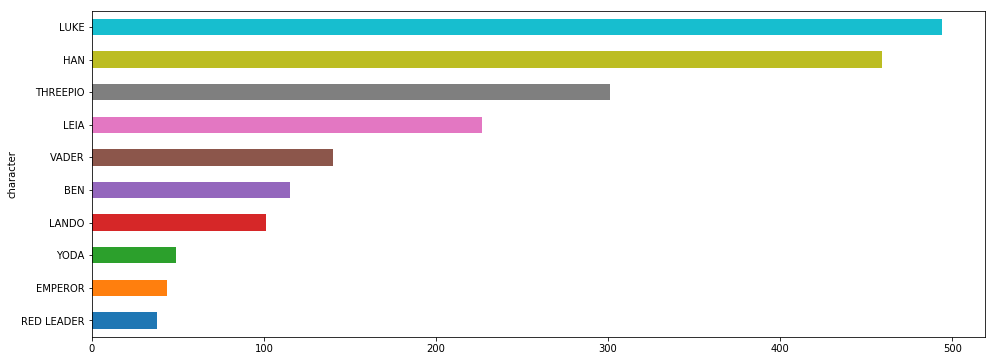

In [63]:
trilogy_dialogue_count.sort_values()[-10:].plot.barh(figsize=(16,6))

## Dialogue count by character and movie

In [92]:
character_dialogue_count = trilogy.groupby(['character', 'movie']).size().unstack('movie')
character_dialogue_count = character_dialogue_count.fillna(0)

movie,Star Wars: Episode IV - A New Hope,Star Wars: Episode V - The Empire Strikes Back,Star Wars: Episode VI - Return of the Jedi
character,,,
ACKBAR,0.0,0.0,14.0
ANAKIN,0.0,0.0,2.0
ANNOUNCER,0.0,3.0,0.0
ASSISTANT OFFICER,0.0,1.0,0.0
ASTRO-OFFICER,1.0,0.0,0.0


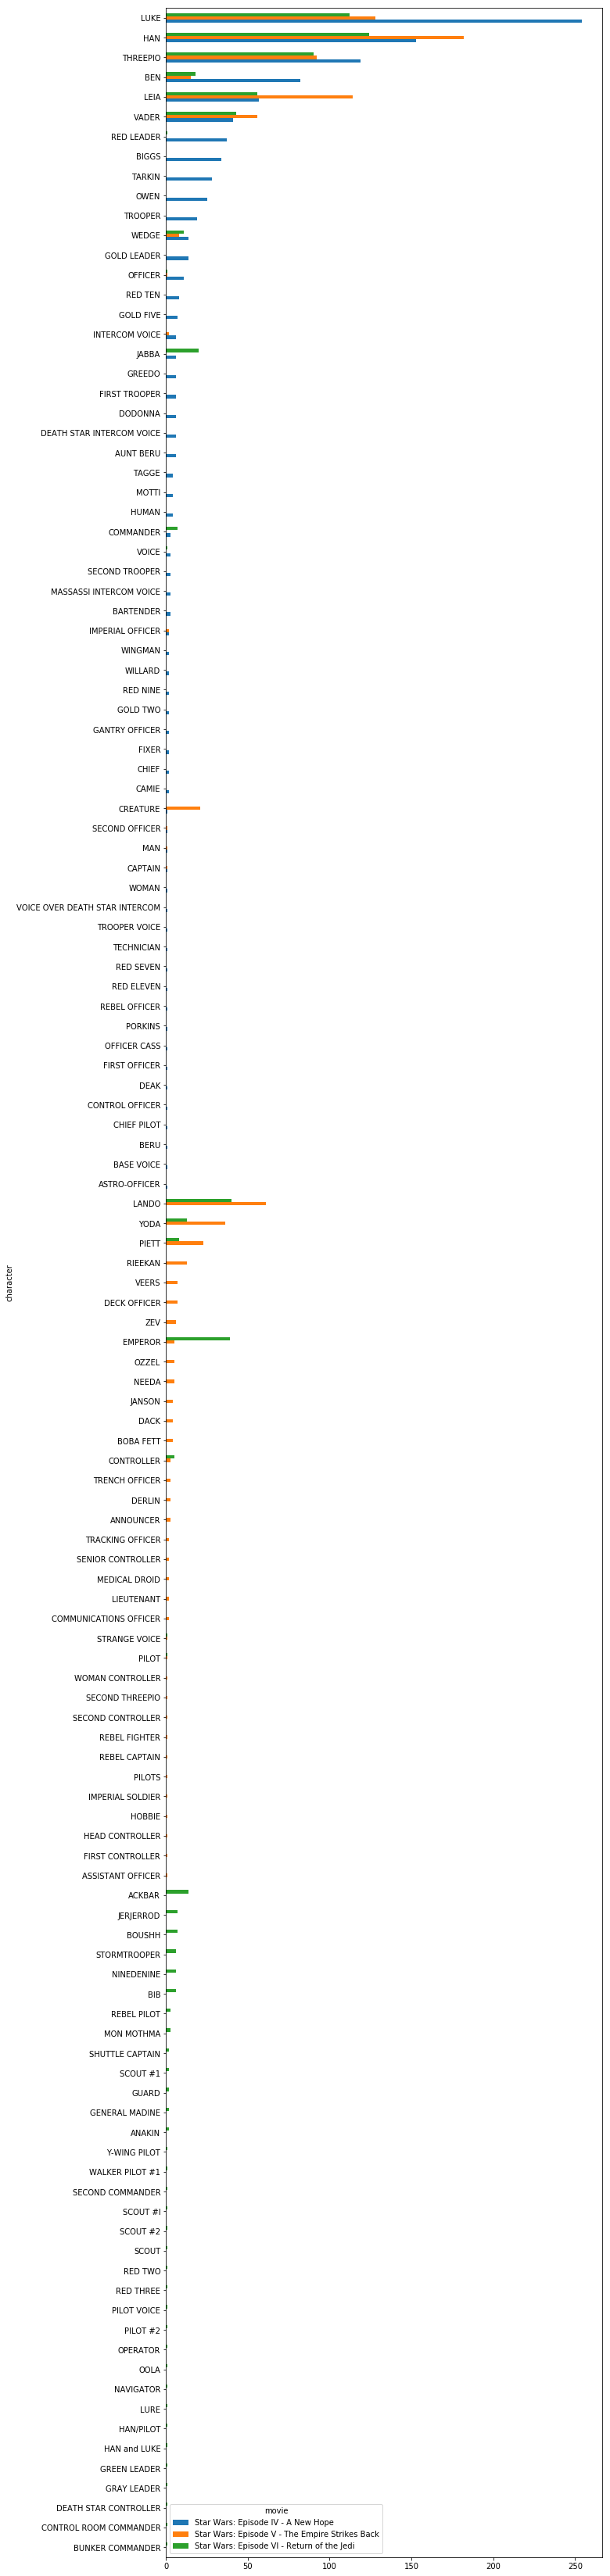

In [99]:
character_dialogue_count.sort_values(by=[SW_EP4,SW_EP5,SW_EP6], ascending=True).plot.barh(figsize=(10,60))